#Import

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install nsepy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import cvxpy as cp
from cvxpy import *
import pandas as pd

#Data Preprocessing

In [ ]:
symbols = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']

startdate = date(2021,1,1)
end_date = date(2021,12,31)

In [ ]:
df = pd.DataFrame()
for i in range(len(symbols)):
    data = gh(symbol=symbols[i],start=startdate, end=(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace=True)
    data.drop(['Symbol'], axis=1,inplace=True)
    if i == 0:
        df = data
    if i != 0:
        df = df.join(data)
df

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2021-01-01,186.50,534.20,527.50,388.10,381.95,1445.00,1260.45,1987.50
2021-01-04,191.30,543.35,531.70,396.40,395.35,1451.05,1288.25,1990.85
2021-01-05,193.20,538.90,537.25,406.30,392.00,1456.85,1293.80,1966.10
2021-01-06,195.40,534.10,546.70,406.40,387.30,1483.45,1282.10,1914.25
2021-01-07,196.75,535.20,541.10,406.75,392.20,1489.45,1262.15,1911.15
...,...,...,...,...,...,...,...,...
2021-12-27,471.15,561.45,736.00,699.60,374.40,839.00,1866.15,2370.25
2021-12-28,480.20,562.45,735.80,705.45,380.40,863.50,1888.00,2398.40
2021-12-29,476.00,566.60,735.70,703.70,381.10,849.35,1885.55,2402.50


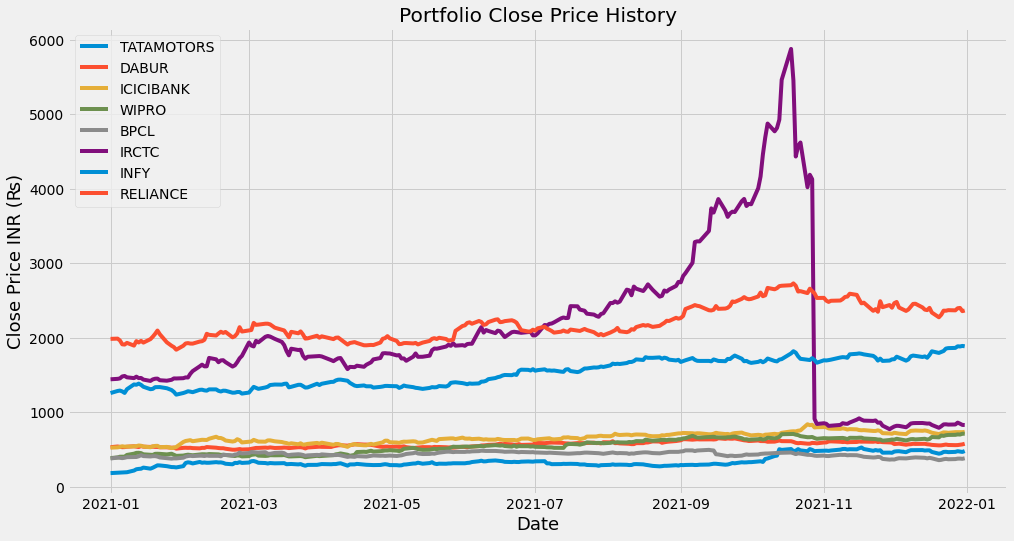

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)


In [ ]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
TATAMOTORS,1.000000,0.301707,0.764620,0.633515,-0.304762,-0.131737,0.641903,0.748960
DABUR,0.301707,1.000000,0.678025,0.820682,0.177813,0.485424,0.813994,0.693420
ICICIBANK,0.764620,0.678025,1.000000,0.889561,0.004754,0.195363,0.860716,0.843508
WIPRO,0.633515,0.820682,0.889561,1.000000,0.037929,0.321214,0.947488,0.822744
BPCL,-0.304762,0.177813,0.004754,0.037929,1.000000,0.522970,-0.073516,-0.006206
IRCTC,-0.131737,0.485424,0.195363,0.321214,0.522970,1.000000,0.232197,0.384793
INFY,0.641903,0.813994,0.860716,0.947488,-0.073516,0.232197,1.000000,0.801302
RELIANCE,0.748960,0.693420,0.843508,0.822744,-0.006206,0.384793,0.801302,1.000000


In [ ]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
data = daily_simple_return
data

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2021-01-04,0.025737,0.017128,0.007962,0.021386,0.035083,0.004187,0.022056,0.001686
2021-01-05,0.009932,-0.008190,0.010438,0.024975,-0.008474,0.003997,0.004308,-0.012432
2021-01-06,0.011387,-0.008907,0.017590,0.000246,-0.011990,0.018259,-0.009043,-0.026372
2021-01-07,0.006909,0.002060,-0.010243,0.000861,0.012652,0.004045,-0.015560,-0.001619
2021-01-08,0.007116,0.009155,0.001756,0.057652,0.020270,-0.012051,0.039575,0.011799
...,...,...,...,...,...,...,...,...
2021-12-27,0.007592,-0.003991,0.012240,0.001647,0.006046,0.002150,0.001422,-0.001075
2021-12-28,0.019208,0.001781,-0.000272,0.008362,0.016026,0.029201,0.011709,0.011876
2021-12-29,-0.008746,0.007378,-0.000136,-0.002481,0.001840,-0.016387,-0.001298,0.001709


In [ ]:
df = daily_simple_return.reset_index(drop=False)
df

,Date,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
0,2021-01-04,0.025737,0.017128,0.007962,0.021386,0.035083,0.004187,0.022056,0.001686
1,2021-01-05,0.009932,-0.008190,0.010438,0.024975,-0.008474,0.003997,0.004308,-0.012432
2,2021-01-06,0.011387,-0.008907,0.017590,0.000246,-0.011990,0.018259,-0.009043,-0.026372
3,2021-01-07,0.006909,0.002060,-0.010243,0.000861,0.012652,0.004045,-0.015560,-0.001619
4,2021-01-08,0.007116,0.009155,0.001756,0.057652,0.020270,-0.012051,0.039575,0.011799
...,...,...,...,...,...,...,...,...,...
242,2021-12-27,0.007592,-0.003991,0.012240,0.001647,0.006046,0.002150,0.001422,-0.001075
243,2021-12-28,0.019208,0.001781,-0.000272,0.008362,0.016026,0.029201,0.011709,0.011876
244,2021-12-29,-0.008746,0.007378,-0.000136,-0.002481,0.001840,-0.016387,-0.001298,0.001709
245,2021-12-30,-0.011765,0.008736,0.000000,0.014779,-0.008266,-0.019250,0.003872,-0.018065


In [ ]:
correlation_matrix = data.corr(method='pearson')
correlation_matrix

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
TATAMOTORS,1.000000,0.118445,0.335963,0.269425,0.395110,0.203021,0.250439,0.328486
DABUR,0.118445,1.000000,0.054768,0.166188,0.189300,0.077711,0.266551,0.158437
ICICIBANK,0.335963,0.054768,1.000000,0.195745,0.177764,0.194784,0.233710,0.308002
WIPRO,0.269425,0.166188,0.195745,1.000000,0.282868,0.184089,0.613135,0.218253
BPCL,0.395110,0.189300,0.177764,0.282868,1.000000,0.216756,0.221866,0.310686
IRCTC,0.203021,0.077711,0.194784,0.184089,0.216756,1.000000,0.138491,0.186932
INFY,0.250439,0.266551,0.233710,0.613135,0.221866,0.138491,1.000000,0.278080
RELIANCE,0.328486,0.158437,0.308002,0.218253,0.310686,0.186932,0.278080,1.000000


In [ ]:
r_means = np.array(data.mean())

In [ ]:
print('Average Daily returns(%)')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)


Average Daily returns(%)
TATAMOTORS    0.435048
DABUR         0.039888
ICICIBANK     0.156014
WIPRO         0.263181
BPCL          0.019400
IRCTC         0.121660
INFY          0.172252
RELIANCE      0.084217
dtype: float64


In [ ]:
month_1.mean(axis=0).values

array([ 0.01905456, -0.00190461,  0.00106623,  0.00420823,  0.00040719,
        0.00045661, -0.00069285, -0.00377012])

#Method 1

##Quadratic programming(GP)
$$
min \sum_{1=1}^{n} \sum_{i=1}^{n} \sigma_{ij}x_{i}x_{j} \\
s.t. \sum_{j=1}^{n} r_{j}x_{j} \geq \alpha B \\
\sum_{j=1}^{n} x_{j} = B \\
0 \leq x_{j} \leq u_{j}, j=1,...,n
$$
where $\sigma_{ij} = (\frac{1}{T}) \sum_{t=1}^{T} (r_{it} - r_{i})(r_{jt}-r_{j})$

$r_{jt}$ is the per krona return invested in security j over period t \\
$r_{j}$ is the average return in security j over the entired period T \\
$x_{j}$ is the portfolio allowcation of security j should nor exceed an upper bound $u_{j}$ \\
$\alpha$ is the minimum (expected) return required by a particular investor \\
$B$ is the total budget that is invested in portfolio



In [ ]:
r_means = np.array(df.mean())
# r_means = np.array(daily_simple_return.meam())
sigma = np.array(correlation_matrix)
x = Variable(8)
alpha = 0.05  
B = 1
u = np.ones(8) 

obj = cp.Minimize(cp.quad_form(x, sigma))

constraints = [sum(x) == B,
               sum(np.multiply(r_means, x)) >= alpha * B,
               x >= 0,
               x <= u]

prob = cp.Problem(obj, constraints)
prob.solve()

0.3141394902797097

In [ ]:
print("Optimal value: ", prob.value)
print("Portfolio allocations: ", x.value)

Optimal value:  0.3141394902797097
Portfolio allocations:  [0.08410004 0.21330689 0.15553532 0.10515448 0.09911351 0.18226571
 0.06029163 0.10023242]


In [ ]:
result = [4.35443827e-01,  4.06022563e-02,  2.93289959e-19,  9.07540979e-20, 3.54038602e-01,  1.69915314e-01,  5.28340215e-20, -1.08803255e-19]

In [ ]:
results = []
for i in range(8):
  res = result[i]
  res = np.round(res, 4)
  results.append(res)

In [ ]:
results

[0.4354, 0.0406, 0.0, 0.0, 0.354, 0.1699, 0.0, -0.0]

---

In [ ]:
r_means = np.array(df.mean())
sigma = np.array(correlation_matrix)
x = Variable(8)
#f_x = sum([sigma[i,j] * x[i] * x[j] for i, j in idx])
alpha = 1.25  
B = 1
u = np.ones(8) 

obj = cp.Minimize(cp.quad_form(x, sigma))

constraints = [sum(x) == B,
               sum(np.multiply(r_means, x)) >= alpha * B,
               x >= 0,
               x <= u]

prob = cp.Problem(obj, constraints)
prob.solve()

0.31741238585746473

In [ ]:
print("Optimal value: ", prob.value)
print("Portfolio allocations: ", x.value)

Optimal value:  0.31741238585746473
Portfolio allocations:  [ 4.35443827e-01  4.06022563e-02  2.93289959e-19  9.07540979e-20
  3.54038602e-01  1.69915314e-01  5.28340215e-20 -1.08803255e-19]


#Method 2

##Maximin formulation 
(to maximize the minimum return)

$\sum_{j=1}^{n} r_{jt}x_{j} \geq z$ \\
$z$ is defined as the minimum return for every period \\

$$
\max z \\
\text{s.t.} \sum_{j=1}^{n} r_{j}x_{j} \geq \alpha B \\
\sum_{j=1}^{n} x_{j} = B \\
\sum_{j=1}^{n} r_{jt}x_{j} \geq z \\
0 \leq x_{j} \leq u_{j}, j=1,...,n , z \geq 0
$$




In [ ]:
# returns = np.array(df) 
z = Variable()
alpha = 1.25
obj = cp.Maximize(z)

constraints = [sum(x) == B,
               sum(np.multiply(r_means, x)) >= alpha * B,
               x >= 0,
               x <= u, 
               z >= 0, 
               sum(np.multiply(returns, x)) >= z]

prob = cp.Problem(obj, constraints)
prob.solve()

1.07456842799865

In [ ]:
print("Optimal value: ", prob.value)
print("Portfolio allocations: ", x.value)

Optimal value:  1.07456842799865
Portfolio allocations:  [1.00000000e+00 2.44561428e-12 7.08138098e-12 2.12815902e-11
 7.90627432e-13 1.35760733e-11 1.78807732e-11 1.08649381e-11]


In [ ]:
result = [1.00000000e+00 ,2.44561428e-12 ,7.08138098e-12, 2.12815902e-11 ,7.90627432e-13 ,1.35760733e-11 ,1.78807732e-11, 1.08649381e-11]
results = []
for i in range(8):
  res = result[i] * 100
  res = np.round(res, 2)
  results.append(res)
results

[100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#Method 3

##Mean absolute deviation minimization (MAD)
$$
\min \frac{1}{T} \sum_{t=1}^{T} y_{t}
$$

$$ 
\text{s.t.} \quad y_{t} \geq -\sum_{j=1}^{n} (r_{jt}-r_{j}) \\
y_{t} \leq \sum_{j=1}^{n} (r_{jt}-r_{j}) \\
\sum_{j=1}^{n} r_{j}x_{j} \geq \alpha B \\
\sum_{j=1}^{n} x_{j} = B \\
0 \leq x_{j} \leq u_{j}, j=1,...,n
$$

In [ ]:
y = Variable(8)
x = Variable(8)
r_means = np.array(df.mean())
returns = np.array(df)

f = sum(y) / 12
obj = cp.Minimize(f)

constraints = [sum(x) == B,
               sum(np.multiply(r_means, x)) >= alpha * B,
               x >= 0,
               x <= u,
               y >= 0,
               y >= -sum(np.multiply(returns - r_means, x)),
               y >= sum(np.multiply(returns - r_means, x))]

prob = cp.Problem(obj, constraints)
prob.solve()

6.858717428764167e-11

In [ ]:
print("Optimal value: ", prob.value)
print("Portfolio allocations: ", x.value)

Optimal value:  6.858717428764167e-11
Portfolio allocations:  [0.2893467  0.14446646 0.11902918 0.15004121 0.20756373 0.02613803
 0.03971053 0.02370416]


In [ ]:
result = [-4.49281554e-10, -2.15752404e-10, -1.50307418e-10, -2.30149517e-10, -3.48826826e-10,  4.36038351e-09,  9.79517216e-10,  9.99999996e-01]

In [ ]:
results = []
for i in range(8):
  res = result[i]
  res = np.round(res, 4)
  results.append(res)

In [ ]:
results

[-0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 1.0]

---

In [ ]:
y = Variable(8)
x = Variable(8)
r_means = np.array(df.mean())
returns = np.array(df)
alpha = 5
f = abs(sum(y)) / 12
obj = cp.Minimize(f)

constraints = [sum(x) == B,
               sum(np.multiply(r_means, x)) >= alpha * B,
               x >= 0,
               x <= u,
               y >= 0,
               y >= -sum(np.multiply(returns - r_means, x)),
               y >= sum(np.multiply(returns - r_means, x)),
               ]

prob = cp.Problem(obj, constraints)
prob.solve()

1.3192074394774786e-10

In [ ]:
print("Optimal value: ", prob.value)
print("Portfolio allocations: ", x.value)

Optimal value:  1.3192074394774786e-10
Portfolio allocations:  [0.2504487  0.1443145  0.12345039 0.14884554 0.1940385  0.04279158
 0.05565803 0.04045276]


In [ ]:
Optimal value:  6.737711260546252e-11
Portfolio allocations:  [0.28887725 0.14461806 0.11920454 0.15018386 0.20753573 0.02613318
 0.03975216 0.02369523]

In [ ]:
ll = 
collect = []
for i in ll:
  col = ll[i] * 100
  collect.append(col)

#Res01

In [ ]:
result = [0.08410004, 0.21330689, 0.15553532, 0.10515448, 0.09911351, 0.18226571, 0.06029163, 0.10023242]
results = []
for i in range(8):
  res = result[i] * 100
  res = np.round(res, 2)
  results.append(res)
results

[8.41, 21.33, 15.55, 10.52, 9.91, 18.23, 6.03, 10.02]

In [ ]:
sum(results)

100.0

#Res03

In [ ]:
result = [0.2504487,  0.1443145,  0.12345039, 0.14884554, 0.1940385,  0.04279158, 0.05565803, 0.04045276]
results = []
for i in range(8):
  res = result[i] * 100
  res = np.round(res, 2)
  results.append(res)

In [ ]:
results

[25.04, 14.43, 12.35, 14.88, 19.4, 4.28, 5.57, 4.05]

In [ ]:
sum(results)

99.99999999999999

In [ ]:
y = Variable(8)
x = Variable(8)
r_means = np.array(df.mean())
returns = np.array(df)
alpha = 50
u = np.ones(8) 
f = abs(sum(y)) / 12
obj = cp.Minimize(f)
B = 1

constraints = [sum(x) == B,
               sum(np.multiply(r_means, x)) >= alpha * B,
               x >= 0,
               x <= u,
               y >= 0,
               y >= -sum(np.multiply(returns - r_means, x)),
               y >= sum(np.multiply(returns - r_means, x)),
               ]

prob = cp.Problem(obj, constraints)
prob.solve()

1.4646598878256034e-10

In [ ]:
print("Optimal value: ", prob.value)
print("Portfolio allocations: ", x.value)

Optimal value:  1.4646598878256034e-10
Portfolio allocations:  [0.24903305 0.14433101 0.12364502 0.14881868 0.19349084 0.04339965
 0.05620471 0.04107703]


In [ ]:
# result = [ 2.61250801e-09,  2.97618220e-08 , 2.91084805e-09,  2.85204778e-09, 9.99999961e-01 ,-1.30541938e-10 , 9.81184506e-10 , 4.95167939e-10]
result = [0.2504487,  0.1443145,  0.12345039, 0.14884554, 0.1940385 , 0.04279158, 0.05565803 ,0.04045276]
results = []
for i in range(8):
  res = result[i] * 100
  res = np.round(res, 2)
  results.append(res)
results

[25.04, 14.43, 12.35, 14.88, 19.4, 4.28, 5.57, 4.05]